<H1>**Ejercicio de Regresion logistica**</H1>
<h1>**Jaiver Barco**

In [219]:
import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns

**Cargo el archivo**

In [220]:
Datos2 = pd.DataFrame(pd.read_csv('./Carv32.csv'))
# regresion lineal  Datos2=pd.read_csv('./Carv32.csv')

In [222]:
Datos2.head()

,Marca,Modelo,PrecioVenta,kilometros,Combustible,seller_type,transmission,owner,mileage,Motor,Potencia,torque,Asientos
0,Maruti Swift Dzire VDI,2014.0,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014.0,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,"Honda City 2017-2020 EXi,2006,158000,140000,Pe...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hyundai i20 Sportz Diesel,2010.0,225000.0,127000.0,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,"Maruti Swift VXI BSIII,2007,130000,120000,Petr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Inspeccion archivo**

In [223]:
Datos2.head(100)

,Marca,Modelo,PrecioVenta,kilometros,Combustible,seller_type,transmission,owner,mileage,Motor,Potencia,torque,Asientos
0,Maruti Swift Dzire VDI,2014.0,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014.0,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,"Honda City 2017-2020 EXi,2006,158000,140000,Pe...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hyundai i20 Sportz Diesel,2010.0,225000.0,127000.0,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,"Maruti Swift VXI BSIII,2007,130000,120000,Petr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Hyundai i20 Asta Optional with Sunroof 1.2,2013.0,525000.0,61500.0,Petrol,Dealer,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
96,Maruti Swift Dzire LDI,2016.0,600000.0,150000.0,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
97,Hyundai Xcent 1.2 Kappa SX Option AT,2016.0,565000.0,72000.0,Petrol,Dealer,Automatic,First Owner,19.1 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
98,Maruti Alto LX BSIII,2008.0,120000.0,68000.0,Petrol,Dealer,Manual,Third Owner,19.7 kmpl,796 CC,46.3 bhp,62Nm@ 3000rpm,5.0


**<h1> como tengo valores Na los borro de la base de datos**
es una limpieza del archivo

In [224]:
Datos2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Marca         8128 non-null   object 
 1   Modelo        7787 non-null   float64
 2   PrecioVenta   7787 non-null   float64
 3   kilometros    7787 non-null   float64
 4   Combustible   7787 non-null   object 
 5   seller_type   7787 non-null   object 
 6   transmission  7787 non-null   object 
 7   owner         7787 non-null   object 
 8   mileage       7566 non-null   object 
 9   Motor         7566 non-null   object 
 10  Potencia      7572 non-null   object 
 11  torque        7565 non-null   object 
 12  Asientos      7566 non-null   float64
dtypes: float64(4), object(9)
memory usage: 825.6+ KB


In [225]:
Datos2_sin_na = Datos2.dropna()

In [183]:
print("Cantidad de filas con valores NaN después de eliminarlas:", Datos2_sin_na.isnull().sum())

Cantidad de filas con valores NaN después de eliminarlas: Marca           0
Modelo          0
PrecioVenta     0
kilometros      0
Combustible     0
seller_type     0
transmission    0
owner           0
mileage         0
Motor           0
Potencia        0
torque          0
Asientos        0
dtype: int64


**me queda una nueva Base unicamente con valores tipo numero**

In [226]:
Datos2.describe()

,Modelo,PrecioVenta,kilometros,Asientos
count,7787.000000,7.787000e+03,7.787000e+03,7566.000000
mean,2014.054193,6.566975e+05,6.840663e+04,5.422284
std,3.911379,8.174188e+05,5.663441e+04,0.955162
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2012.000000,2.750000e+05,3.300150e+04,5.000000
50%,2015.000000,4.599990e+05,6.000000e+04,5.000000
75%,2017.000000,6.965000e+05,9.000000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


**Genero Graficas**

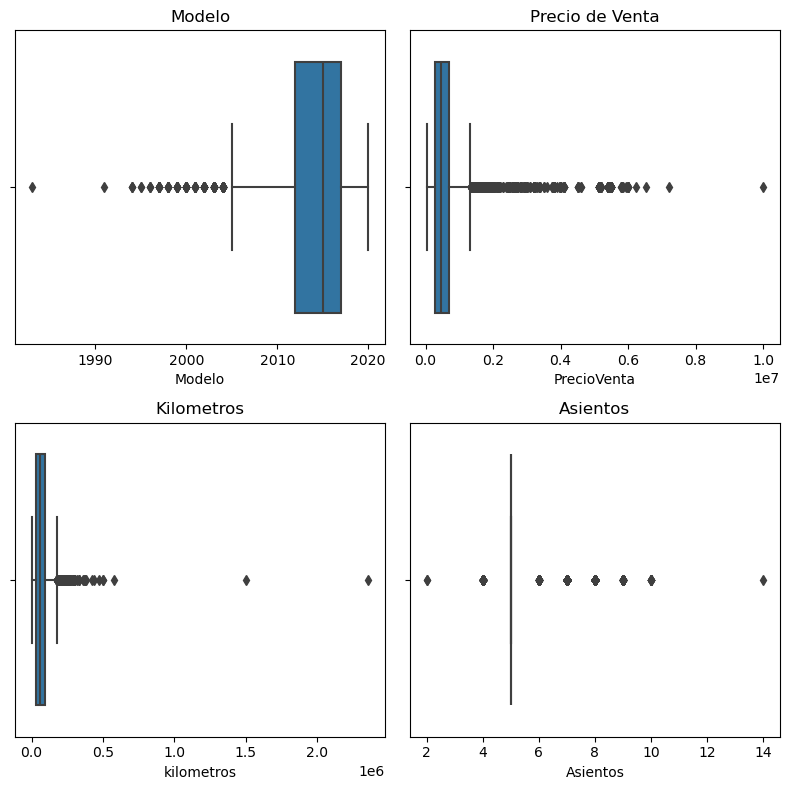

In [227]:
fig, axs = plt.subplots(2,2, figsize = (8,8))
titulos = ['Modelo', 'Precio de Venta', 'Kilometros', 'Asientos']
#plt1 = sns.boxplot(Datos2['Modelo'], ax = axs[0,0]).
#plt2 = sns.boxplot(Datos2['PrecioVenta'], ax = axs[0,1])
#plt3 = sns.boxplot(Datos2['kilometros'], ax = axs[1,0])
#plt4 = sns.boxplot(Datos2['Asientos'], ax = axs[1,1])
#plt2 = sns.boxplot(Datos2['Combustible'], ax = axs[1,1])
#plt3 = sns.boxplot(Datos2['seller_type'], ax = axs[1,2])
sns.boxplot(x=Datos2['Modelo'], ax=axs[0, 0]).set(title=titulos[0])
sns.boxplot(x=Datos2['PrecioVenta'], ax=axs[0, 1]).set(title=titulos[1])
sns.boxplot(x=Datos2['kilometros'], ax=axs[1, 0]).set(title=titulos[2])
sns.boxplot(x=Datos2['Asientos'], ax=axs[1, 1]).set(title=titulos[3])

plt.tight_layout()
plt.show()

In [228]:
nivel_min=2
nivel_max=8
Total_atipicos=((Datos2['Asientos']<nivel_min)|(Datos2['Asientos']>nivel_max)).sum()
print("El total de Datos Atipicos es:{}".format(Total_atipicos))

El total de Datos Atipicos es:86


In [229]:
Datos2_sin_atipicos = Datos2[(Datos2['Asientos'] >= nivel_min) & (Datos2['Asientos'] <= nivel_max)]

# Verificar la cantidad de filas antes y después de eliminar los atípicos
print("Cantidad de filas antes de eliminar los atípicos:", len(Datos2))
print("Cantidad de filas después de eliminar los atípicos:", len(Datos2_sin_atipicos))

Cantidad de filas antes de eliminar los atípicos: 8128
Cantidad de filas después de eliminar los atípicos: 7480


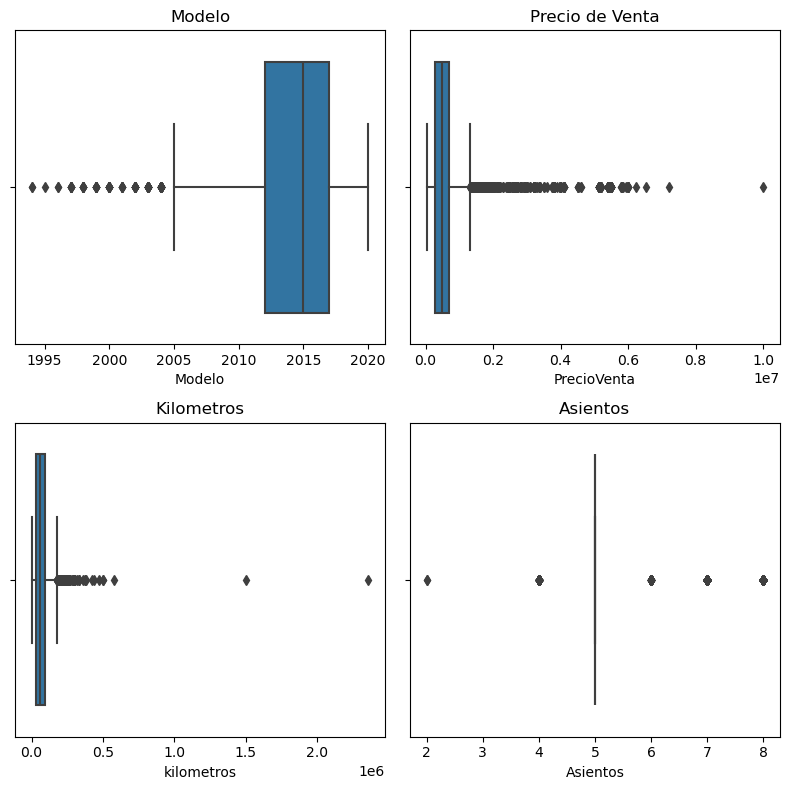

In [194]:
fig, axs = plt.subplots(2,2, figsize = (8,8))
titulos = ['Modelo', 'Precio de Venta', 'Kilometros', 'Asientos']
sns.boxplot(x=Datos2_sin_atipicos['Modelo'], ax=axs[0, 0]).set(title=titulos[0])
sns.boxplot(x=Datos2_sin_atipicos['PrecioVenta'], ax=axs[0, 1]).set(title=titulos[1])
sns.boxplot(x=Datos2_sin_atipicos['kilometros'], ax=axs[1, 0]).set(title=titulos[2])
sns.boxplot(x=Datos2_sin_atipicos['Asientos'], ax=axs[1, 1]).set(title=titulos[3])

plt.tight_layout()
plt.show()

In [230]:
nivel_min=0.0
nivel_max=1000000
Total_atipicos=((Datos2_sin_atipicos['kilometros']<nivel_min)|(Datos2_sin_atipicos['kilometros']>nivel_max)).sum()
print("El total de Datos Atipicos es:{}".format(Total_atipicos))

El total de Datos Atipicos es:2


In [231]:
Datos2=Datos2_sin_atipicos[(Datos2_sin_atipicos['Asientos'] >= nivel_min) & (Datos2_sin_atipicos['Asientos'] <= nivel_max)]

# Verificar la cantidad de filas antes y después de eliminar los atípicos
print("Cantidad de filas antes de eliminar los atípicos:", len(Datos2_sin_atipicos))
print("Cantidad de filas después de eliminar los atípicos:", len(Datos2))

Cantidad de filas antes de eliminar los atípicos: 7480
Cantidad de filas después de eliminar los atípicos: 7480


In [232]:
Datos2_sin_atipicos.head()

,Marca,Modelo,PrecioVenta,kilometros,Combustible,seller_type,transmission,owner,mileage,Motor,Potencia,torque,Asientos
0,Maruti Swift Dzire VDI,2014.0,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014.0,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
3,Hyundai i20 Sportz Diesel,2010.0,225000.0,127000.0,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017.0,440000.0,45000.0,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
7,Maruti 800 DX BSII,2001.0,45000.0,5000.0,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0


In [233]:
Datos= Datos2_sin_atipicos.copy()

In [234]:
Datos.head()

,Marca,Modelo,PrecioVenta,kilometros,Combustible,seller_type,transmission,owner,mileage,Motor,Potencia,torque,Asientos
0,Maruti Swift Dzire VDI,2014.0,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014.0,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
3,Hyundai i20 Sportz Diesel,2010.0,225000.0,127000.0,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017.0,440000.0,45000.0,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
7,Maruti 800 DX BSII,2001.0,45000.0,5000.0,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0


In [235]:
print(Datos.dtypes)

Marca            object
Modelo          float64
PrecioVenta     float64
kilometros      float64
Combustible      object
seller_type      object
transmission     object
owner            object
mileage          object
Motor            object
Potencia         object
torque           object
Asientos        float64
dtype: object


**<h1> mediante esta instruccion selecciono unicamente los datos tipo float de la base de datos</h1>**

In [236]:
Datos2 = Datos.select_dtypes(include=['float64'])

# Verificar las primeras filas del nuevo DataFrame
print(Datos2.head())

   Modelo  PrecioVenta  kilometros  Asientos
0  2014.0     450000.0    145500.0       5.0
1  2014.0     370000.0    120000.0       5.0
3  2010.0     225000.0    127000.0       5.0
5  2017.0     440000.0     45000.0       5.0
7  2001.0      45000.0      5000.0       4.0


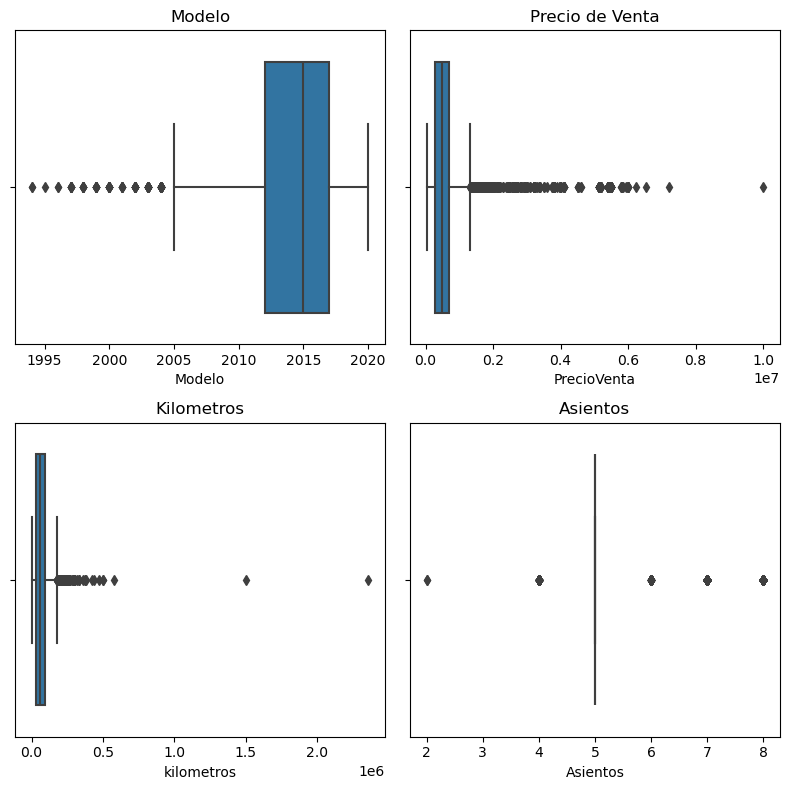

In [237]:
fig, axs = plt.subplots(2,2, figsize = (8,8))
titulos = ['Modelo', 'Precio de Venta', 'Kilometros', 'Asientos']
sns.boxplot(x=Datos2['Modelo'], ax=axs[0, 0]).set(title=titulos[0])
sns.boxplot(x=Datos2['PrecioVenta'], ax=axs[0, 1]).set(title=titulos[1])
sns.boxplot(x=Datos2['kilometros'], ax=axs[1, 0]).set(title=titulos[2])
sns.boxplot(x=Datos2['Asientos'], ax=axs[1, 1]).set(title=titulos[3])

plt.tight_layout()
plt.show()

**Genero Graficos**

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

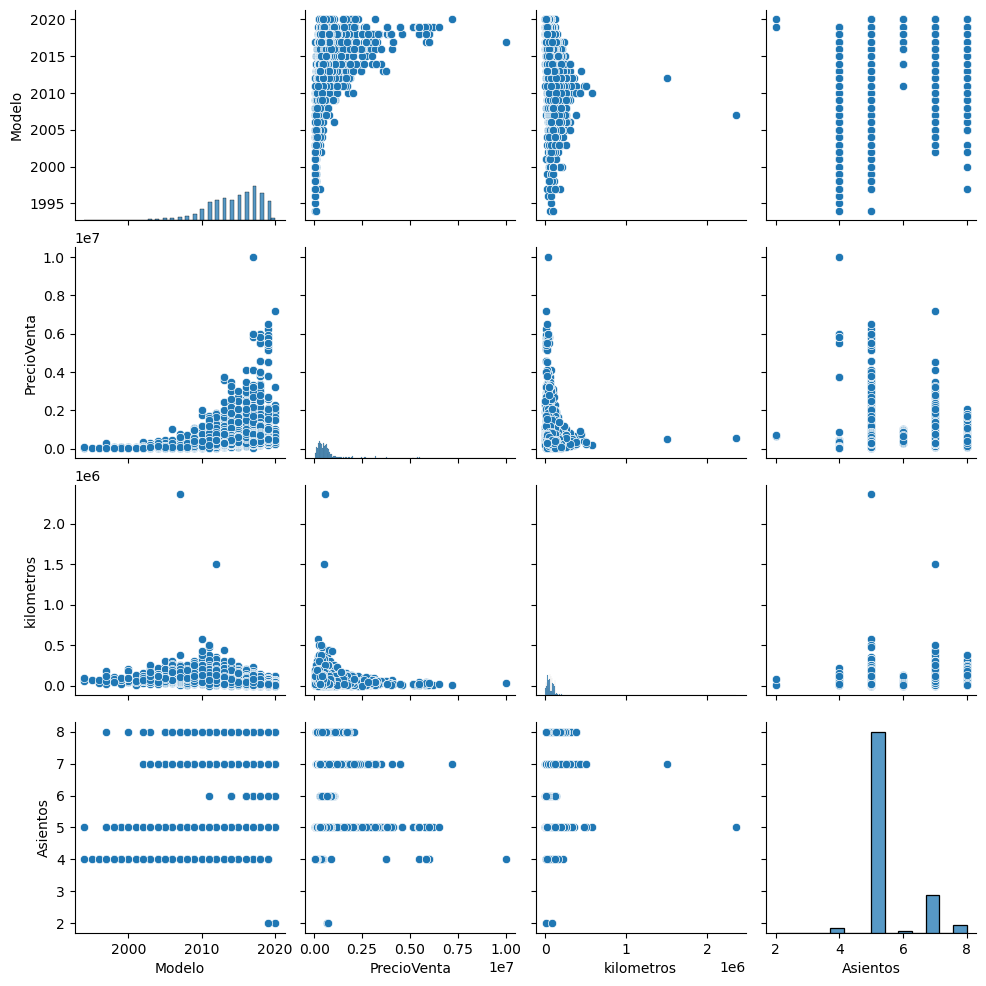

In [238]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(Datos2)
plt.show()

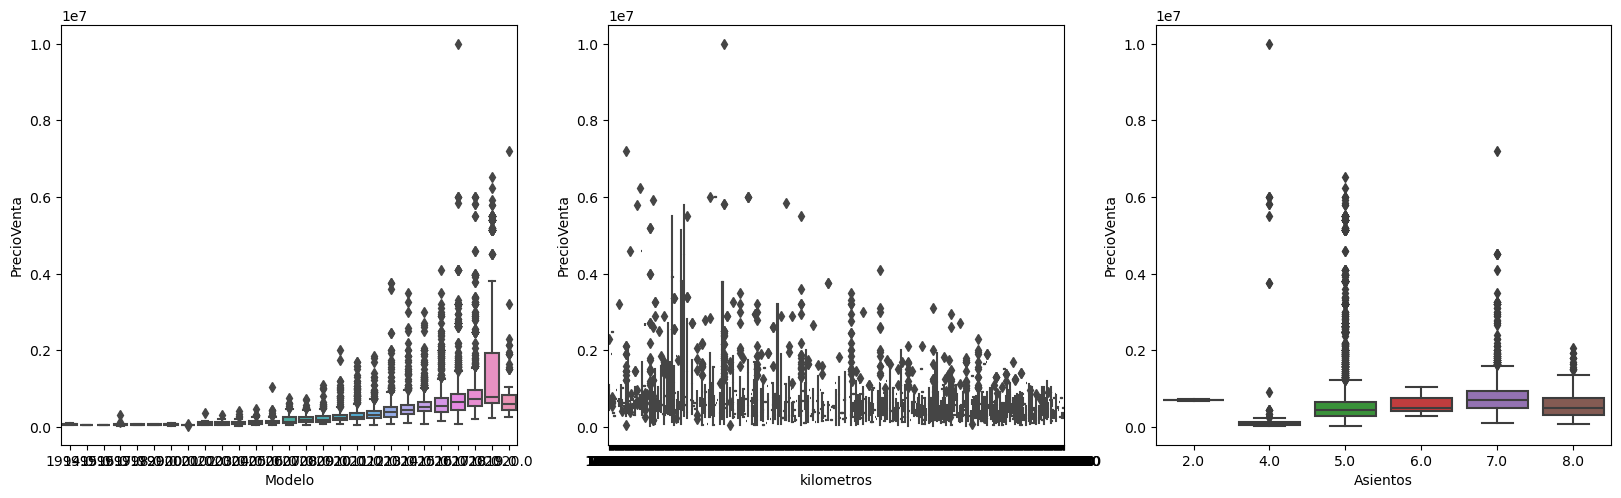

In [239]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'Modelo', y = 'PrecioVenta', data = Datos2)
plt.subplot(2,3,2)
sns.boxplot(x = 'kilometros', y = 'PrecioVenta', data = Datos2)
plt.subplot(2,3,3)
sns.boxplot(x = 'Asientos', y = 'PrecioVenta', data = Datos2)
plt.show()


<h1><span style="color:red">analisis</span>

**<H1>Podemos observar que hay una relacion entre el precio de venta y el modelo, esta es de tipo lineal positiva, a medida que aumenta el modelo, es decir entre mas nuevo sea el vehiculo su precio aumenta </h1>**

**Lo contrario sucede con el Kilometraje, pues es una relacion de tipo Inversa a medida que aumenta el kilometraje, el precio de venta disminuye**

*Respecto a los asientos a simple vista no se observa ninguna relación*

**Splitting the Data into Training and Testing Sets**

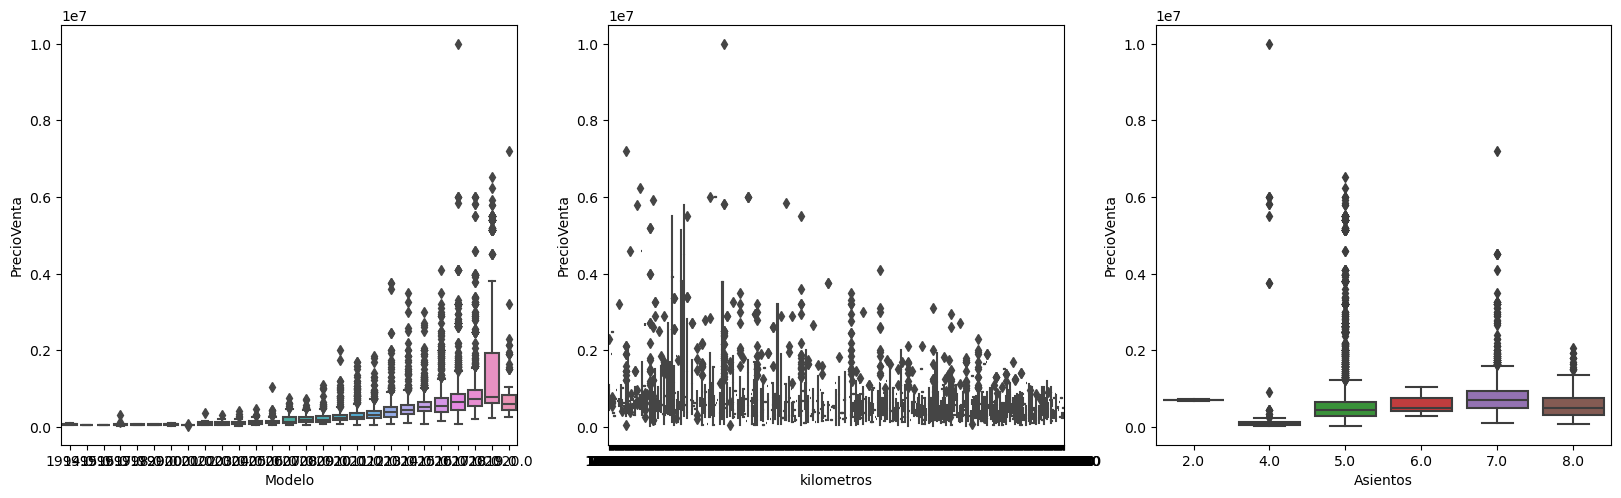

In [240]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'Modelo', y = 'PrecioVenta', data = Datos2)
plt.subplot(2,3,2)
sns.boxplot(x = 'kilometros', y = 'PrecioVenta', data = Datos2)
plt.subplot(2,3,3)
sns.boxplot(x = 'Asientos', y = 'PrecioVenta', data = Datos2)
plt.show()

In [242]:
Datos2.head()

,Modelo,PrecioVenta,kilometros,Asientos
0,2014.0,450000.0,145500.0,5.0
1,2014.0,370000.0,120000.0,5.0
3,2010.0,225000.0,127000.0,5.0
5,2017.0,440000.0,45000.0,5.0
7,2001.0,45000.0,5000.0,4.0


**Divido los datos Training and Testing Sets**

In [245]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(Datos2, train_size = 0.7, test_size = 0.3, random_state = 100)

In [247]:
df_train.describe()

,Modelo,PrecioVenta,kilometros,Asientos
count,5236.000000,5.236000e+03,5.236000e+03,5236.000000
mean,2014.212949,6.766795e+05,6.722357e+04,5.372231
std,3.694431,8.447050e+05,5.637854e+04,0.862851
min,1994.000000,2.999900e+04,1.000000e+00,2.000000
25%,2012.000000,2.900000e+05,3.200000e+04,5.000000
50%,2015.000000,4.750000e+05,6.000000e+04,5.000000
75%,2017.000000,7.000000e+05,9.000000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,8.000000


escala a los valores para dejarlo en la misma metrica

**<H1>Ahora construyo el modelo**</h1>

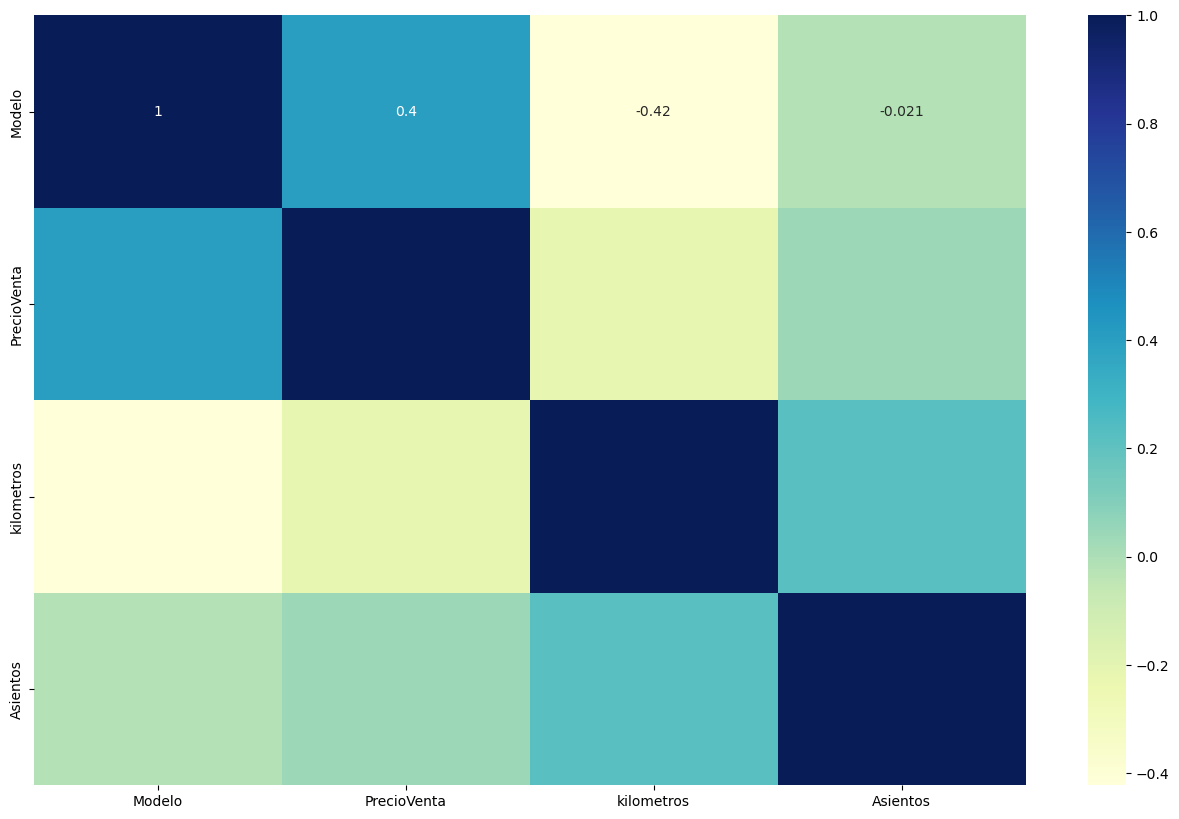

In [248]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

**MODELO DE REGRESION LINEAL**

In [249]:
y_train = df_train.pop('PrecioVenta')
X_train = df_train

In [250]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [251]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [256]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Crear un modelo de regresión lineal
lm = LinearRegression()

# Inicializar RFE con el modelo y el número de características deseadas
rfe = RFE(estimator=lm, n_features_to_select=3)

# Ajustar RFE a los datos de entrenamiento
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=3)

In [257]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Modelo', True, 1), ('kilometros', True, 1), ('Asientos', True, 1)]

In [258]:
col = X_train.columns[rfe.support_]
col

Index(['Modelo', 'kilometros', 'Asientos'], dtype='object')

In [259]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

**construir un modelo utilizando StatsModels para obtener estadísticas detalladas**

In [260]:
X_train_rfe = X_train[col]

In [261]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [262]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [263]:
#resumen del modelo
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            PrecioVenta   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     354.9
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          8.49e-210
Time:                        01:09:07   Log-Likelihood:                -78398.
No. Observations:                5236   AIC:                         1.568e+05
Df Residuals:                    5232   BIC:                         1.568e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.72e+08   6.42e+06    -26.765      0.0

In [264]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [265]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,364310.71
2,kilometros,1.29
1,Modelo,1.23
3,Asientos,1.06


análisis de los residuos (error términos) y verificar si siguen una distribución normal

In [266]:
y_train_price = lm.predict(X_train_rfe)

In [267]:
res = (y_train_price - y_train)

In [268]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_23456\2089857793.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_price), bins = 20)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Errors')

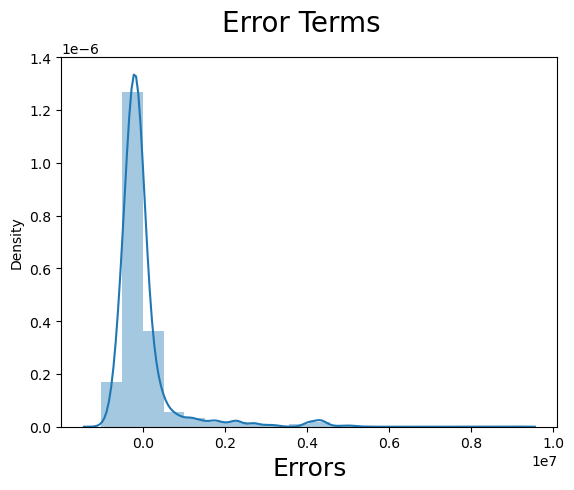

In [269]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


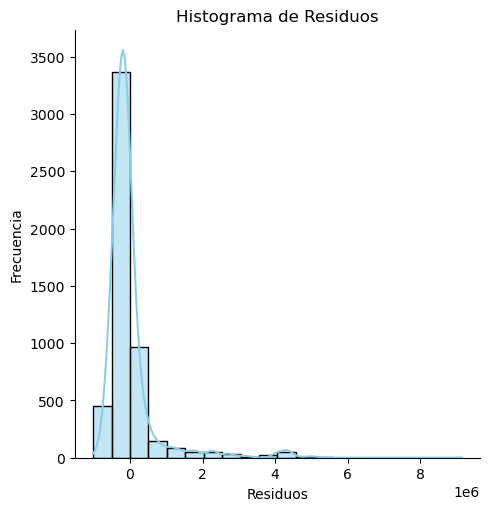

In [271]:
import seaborn as sns

# Graficar un histograma de los residuos usando displot
sns.displot((y_train -  y_train_price), bins=20, color='skyblue', kde=True)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.show()

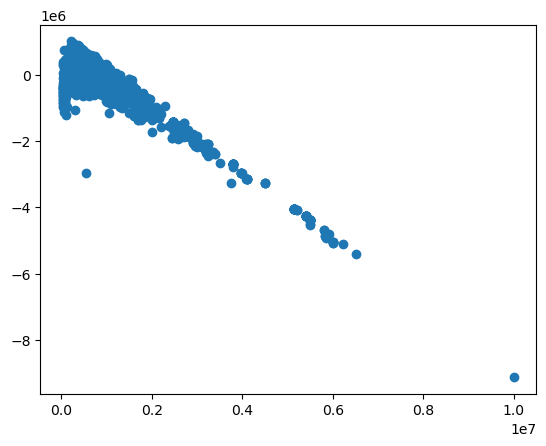

In [273]:
plt.scatter(y_train,res)
plt.show()

In [275]:
y_test = df_test.pop('PrecioVenta')
X_test = df_test

In [276]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [277]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_rfe = X_test[X_train_rfe.columns]

In [278]:
y_pred = lm.predict(X_test_rfe)

In [279]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.16621559811712783

El coeficiente de determinación \( R^2 \) es igual a {{ 0.1662}}
paso:

<H1>analisis<h1>
El valor del coeficiente de determinación es de   de 0.1662 significa que aproximadamente el 16.62% de la variabilidad en la variable obj
tPrecio de ventadecir) es explicada por el modelo. En otras palabras, el modelo captura solo una pequeña fracción de la variabilidad presente en los datos.

Text(0, 0.5, 'y_pred')

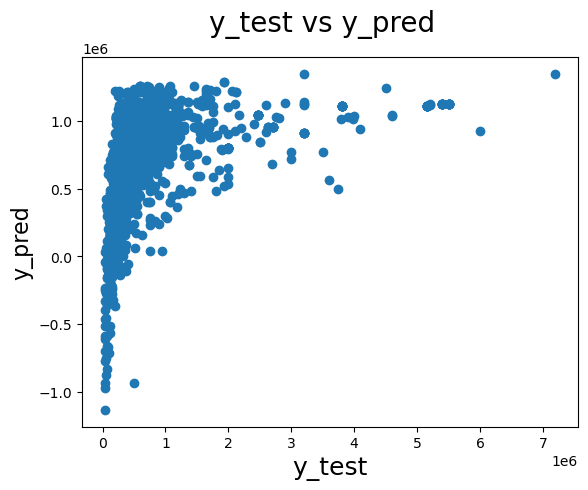

In [280]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

<span style="color:red; font-size:larger">Un valor de R^2
2
  de 0.1662 indica que aproximadamente el 16.62% de la variabilidad en el precio de venta del vehículo es explicada por el modelo que incluye el número de asientos, el modelo del vehículo y el kilometraje.</span>

<h1>el modelo actual tiene una capacidad limitada para predecir el precio de venta del vehículo utilizando solo estas variables. Esto sugiere que otras variables o características pueden tener una influencia significativa en el precio de venta y no están siendo consideradas en el modelo actual.</h1>h1